## Big Data and Data Mining Analytics Assignment 

## GROUP ASSIGNMENT

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

### for metrics

from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, accuracy_score, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split as tts

- The six set features have been concatenated along columns to get a single data of length 2000 and with 649 variables to work with.

In [37]:
## importing mfeat reduced data using Linear discriminant Analysis
mfeat_LDA = pd.read_csv("LDA_reduced_data.csv")


## importing mfeat reduced data using Principal Component Analysis
mfeat_PCA = pd.read_csv("PCA_reduced_data.csv")

In [38]:
## The entire dataset
mfeat_LDA.head(10)

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9
0,-14.973783,-1.455131,14.827441,-1.757582,2.181213,-1.297706,0.839328,-0.518066,0.478846
1,-15.011753,-2.930454,14.471353,-0.446116,1.529450,-0.914081,1.133673,-0.347395,1.898329
2,-14.329554,-1.050030,15.382429,-0.229167,2.083188,-2.277370,0.528144,0.941125,2.723393
3,-15.490976,-1.709028,13.192656,-1.866386,2.319998,-0.686139,0.991317,0.481990,2.123001
4,-15.600798,-0.459971,14.323794,1.051791,1.907347,0.044476,0.751854,0.818846,0.519898
5,-14.130766,1.676957,11.555143,0.621411,0.936789,-0.685127,0.527741,-0.376031,2.332327
6,-16.098423,-1.369057,13.430322,-0.517536,2.940876,-2.663417,0.374337,-0.325004,2.476979
7,-14.919607,-1.206925,15.754082,-1.314933,2.652064,0.026110,0.893576,-0.580026,0.563779
8,-15.877360,-2.976265,14.504690,-0.172932,2.512197,-1.379813,1.286716,-0.671177,2.724717
9,-14.993682,-0.741186,13.129206,0.146117,3.188018,-1.966560,-0.344180,1.503539,2.001849


In [14]:
mfeat_PCA.head(10)

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10
0,-10.792587,-14.217229,-2.735840,-2.498813,-1.183472,7.075655,-2.578780,2.312855,-1.391230,1.417175
1,-8.030707,-13.084227,1.290484,-5.413479,-5.434129,7.035879,0.875896,2.192293,-3.160373,1.651192
2,-11.856732,-12.375021,0.499917,-0.850888,-4.471142,3.153493,-6.135362,6.616403,-4.272699,-1.366273
3,-8.377406,-13.201985,-1.619564,-2.736352,-2.866328,2.761106,-1.290269,6.484547,-3.559916,0.849158
4,-11.087021,-10.574100,-0.976119,-6.274910,-2.339075,7.777125,1.281137,2.372110,-2.397869,-3.129942
5,-2.051055,0.042130,-0.471953,-9.995847,-4.317001,9.238448,8.875406,9.483457,5.966310,1.696471
6,-10.531297,-14.047511,-3.341206,-1.979377,1.158816,6.377539,-3.895159,1.885655,3.269452,2.262244
7,-10.424361,-13.361026,-3.615689,-2.772350,-2.981371,7.811776,0.190829,2.041583,-4.391992,-2.557781
8,-10.262813,-14.154127,-3.795850,-4.698152,0.405911,7.698202,-4.398268,1.520930,5.878807,4.823498
9,-10.073066,-13.347917,-3.019856,-3.234466,-0.746191,2.256449,-7.330854,3.954123,2.259806,0.210031


- The dataset is categorized into 10 classes with the first 200 patterns belonging to class 0, followed by set of 200 belonging to class 1 and so on. 
- I created the classes for the 2000 observations as indicated in the data description

In [15]:
class_0 = pd.Series(np.zeros(200))
class_1 = pd.Series(np.ones(200))
class_2 = pd.Series(np.ones(200)*2)
class_3 =pd.Series(np.ones(200)*3)
class_4 = pd.Series(np.ones(200)*4)
class_5 = pd.Series(np.ones(200)*5)
class_6 = pd.Series(np.ones(200)*6)
class_7 = pd.Series(np.ones(200)*7)
class_8 = pd.Series(np.ones(200)*8)
class_9 = pd.Series(np.ones(200)*9)

In [16]:
## Classes merged to one pandas series
classes = pd.concat([class_0, class_1, class_2, class_3, class_4, class_5, class_6, class_7, class_8, class_9])

In [36]:
### target class
y = classes.values

## Supervised Classification with model stacking and evaluation

In [25]:
def for_split(X,y):
    X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.25, random_state = 256)
    return X_train, X_test, y_train, y_test

In [53]:
def stacked_models(data, target):
    models = []
    models.append(['Linear Discriminant Analysis', LinearDiscriminantAnalysis()])
    models.append(['Random Forest', RandomForestClassifier(random_state=0)])
    models.append(['SVM', SVC(random_state = 0)])
    models.append(['KNN', KNeighborsClassifier(n_neighbors=10)])
    models.append(['Logistic_Regression', LogisticRegression(penalty='l2')])
    
    ### for classification report
    target_names = ['class 0', 'class 1', 'class 2','class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
    
    #### for train_test_split
    X_train, X_test, y_train, y_test = for_split(data,target)
    
    ### get history for model performance for tabular view
    history_overall= []

    for m in range(len(models)):
        history = []
        model = models[m][1]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = model.score(X_test, y_test)
        cm = confusion_matrix(y_test, y_pred)  #, labels=target_names)

        print(models[m][0],':')
        print(score)
        print(cm)
        print(classification_report(y_test, y_pred, target_names = target_names))
        history.append(models[m][0])
        history.append(score)
        history.append(precision_score(y_test, y_pred,average='weighted'))
        history.append(recall_score(y_test, y_pred, average='weighted'))
        history.append(f1_score(y_test, y_pred, average='weighted'))
        history_overall.append(history)

    ### Get the details for the performance of each model and evaluate which model performs better
    Performance_History=pd.DataFrame(history_overall, columns = ["Model", "Accuracy", "Precision", "Recall", "F1"])

    Performance_History.sort_values(by= ['Accuracy', 'Precision', 'Recall', 'F1'], inplace= True, ascending= False)
    Performance_History
    print("Performance Details for each stacked model: ")
    return Performance_History

#### Performance of the Mfeat dataset by PCA dimensionality reduction

In [54]:
## Using the first 10 components 
X_mfeat = mfeat_PCA
stacked_models(X_mfeat, y)

Linear Discriminant Analysis :
0.936
[[44  0  0  0  0  0  0  0  2  0]
 [ 0 44  0  1  1  0  0  0  0  2]
 [ 0  0 48  0  0  0  0  2  0  0]
 [ 0  2  1 36  0  2  0  0  0  0]
 [ 0  2  0  0 56  0  0  0  0  0]
 [ 0  1  0  4  0 49  0  0  0  0]
 [ 0  0  0  0  1  0 50  0  4  0]
 [ 0  0  2  1  0  0  0 47  0  0]
 [ 0  1  1  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0  0  2 44]]
              precision    recall  f1-score   support

     class 0       1.00      0.96      0.98        46
     class 1       0.88      0.92      0.90        48
     class 2       0.92      0.96      0.94        50
     class 3       0.86      0.88      0.87        41
     class 4       0.97      0.97      0.97        58
     class 5       0.96      0.91      0.93        54
     class 6       1.00      0.91      0.95        55
     class 7       0.96      0.94      0.95        50
     class 8       0.86      0.96      0.91        52
     class 9       0.96      0.96      0.96        46

    accuracy                        

,Model,Accuracy,Precision,Recall,F1
2,SVM,0.970,0.971109,0.970,0.970052
3,KNN,0.958,0.959285,0.958,0.958042
1,Random Forest,0.954,0.954588,0.954,0.953985
4,Logistic_Regression,0.948,0.950852,0.948,0.948380
0,Linear Discriminant Analysis,0.936,0.938412,0.936,0.936467


- LightGBM has the best performance on the PCA reduced data.

#### Performance of the Mfeat dataset by LDA dimensionality reduction

In [55]:
stacked_models(mfeat_LDA,y)

Linear Discriminant Analysis :
1.0
[[46  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 58  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  0  0]
 [ 0  0  0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0  0  0 52  0]
 [ 0  0  0  0  0  0  0  0  0 46]]
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        46
     class 1       1.00      1.00      1.00        48
     class 2       1.00      1.00      1.00        50
     class 3       1.00      1.00      1.00        41
     class 4       1.00      1.00      1.00        58
     class 5       1.00      1.00      1.00        54
     class 6       1.00      1.00      1.00        55
     class 7       1.00      1.00      1.00        50
     class 8       1.00      1.00      1.00        52
     class 9       1.00      1.00      1.00        46

    accuracy                          

,Model,Accuracy,Precision,Recall,F1
0,Linear Discriminant Analysis,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0
2,SVM,1.0,1.0,1.0,1.0
3,KNN,1.0,1.0,1.0,1.0
4,Logistic_Regression,1.0,1.0,1.0,1.0


- It is evident from the Precision, Recall ad F1 score that Random Forest is the best model.

In [56]:
def best_models(model, data, target):
    
    #### Getting data
    X_train, X_test, y_train, y_test = for_split(data,target)
    
    #Fitting Classifier Model
    classifier = model
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    print("Model: ", classifier)
    print(classification_report(y_test, y_pred))
    #print(f'ROC AUC score: {roc_auc_score(y_test, y_prob, labels = ("ovo", "ovr"))}')
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))

    # Visualizing Confusion Matrix
    target_names = ['class 0', 'class 1', 'class 2','class 3', 'class 4', 
                    'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
    
    target_pred = ['Predicted_class 0', 'Predicted_class 1', 'Predicted_class 2','Predicted_class 3', 'Predicted_class 4', 
                    'Predicted_class 5', 'Predicted_class 6', 'Predicted_class 7', 'Predicted_class 8', 'Predicted_class 9']
    
    plt.figure(figsize = (10,8))
    sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
                yticklabels = target_names, xticklabels = target_pred)
    plt.yticks(rotation = 0)
    plt.show()

In [57]:
Best_models = [
    LinearDiscriminantAnalysis(),
    SVC(random_state = 0)
]

Model:  LinearDiscriminantAnalysis()
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        46
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        50
         3.0       1.00      1.00      1.00        41
         4.0       1.00      1.00      1.00        58
         5.0       1.00      1.00      1.00        54
         6.0       1.00      1.00      1.00        55
         7.0       1.00      1.00      1.00        50
         8.0       1.00      1.00      1.00        52
         9.0       1.00      1.00      1.00        46

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Accuracy Score:  1.0


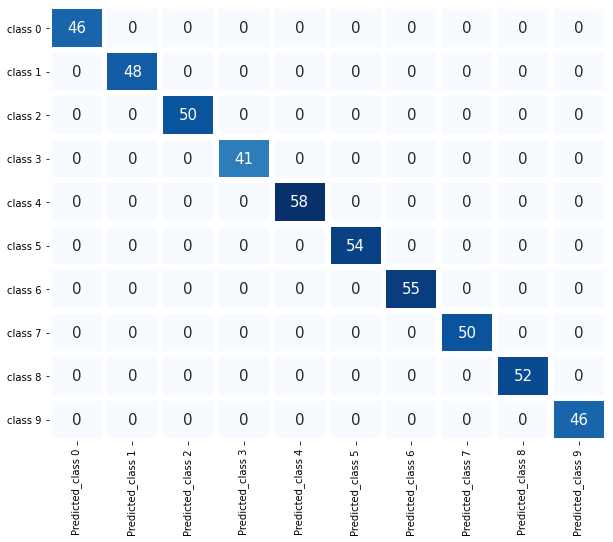

Model:  SVC(random_state=0)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        46
         1.0       1.00      1.00      1.00        48
         2.0       1.00      1.00      1.00        50
         3.0       1.00      1.00      1.00        41
         4.0       1.00      1.00      1.00        58
         5.0       1.00      1.00      1.00        54
         6.0       1.00      1.00      1.00        55
         7.0       1.00      1.00      1.00        50
         8.0       1.00      1.00      1.00        52
         9.0       1.00      1.00      1.00        46

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Accuracy Score:  1.0


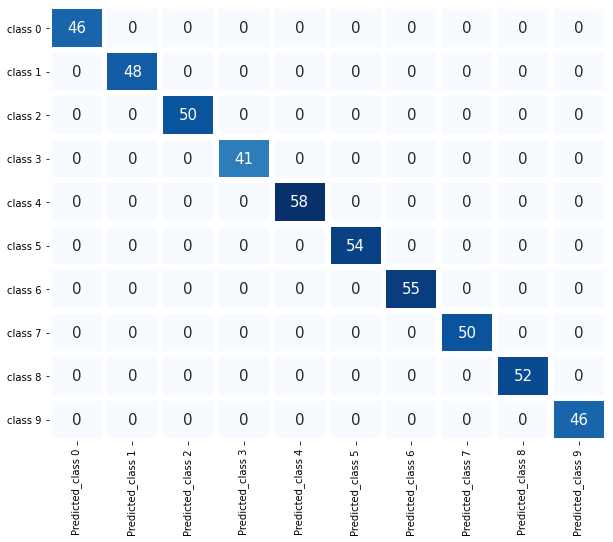

In [60]:
for model in Best_models:
    best_models(model, mfeat_LDA, y)